In [ ]:
## LAB 3 BEGINS HERE

In [1]:
# Creating an new Jupyter notebook and starting from scratch for the sake of this lab

#0 Get the data

import pandas as pd
import numpy as np

marketing = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

marketing.shape

(9134, 24)

In [2]:
#1 Show DataFrame info.

marketing.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [3]:
#2a Describe DataFrame. NUMERIC
data_numeric = marketing.describe().T 
data_numeric = data_numeric.apply(lambda x: round(x ,2))
data_numeric

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


In [4]:
#2b Describe DataFrame. OBJECT
data_object = marketing.describe(include=[object]).T 
data_object

,count,unique,top,freq
Customer,9134,9134,IX68587,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


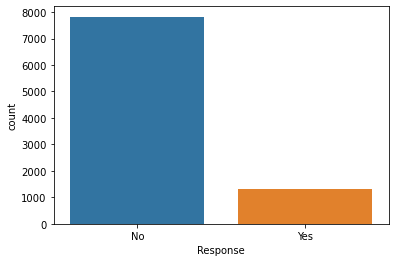

In [5]:
#3 Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x = 'Response', data = marketing)
plt.show()


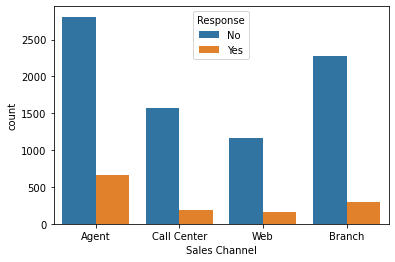

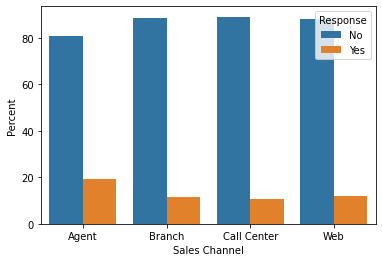

In [6]:
#4 Show a plot of the response rate by the sales channel.

# I started with this, but then realized this is a count and not the rate so had to find a way to convert these bars to rates.
sns.countplot(x = 'Sales Channel', hue = 'Response', data = marketing)
plt.show()

#The answer came from a Medium article (https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb)
# where this code was presented & I slightly modified it to fit the purpose here:
resp_by_sc = marketing.groupby('Sales Channel')['Response'].value_counts(normalize=True)
resp_by_sc = resp_by_sc.mul(100).rename('Percent').reset_index()
resp_by_sc
#The only operation I do not fully understand is the .reset_index() in terms of the columns, we can maybe go through data in the class

sns.barplot(x = 'Sales Channel', y = 'Percent', hue = 'Response', data = resp_by_sc)
plt.show()

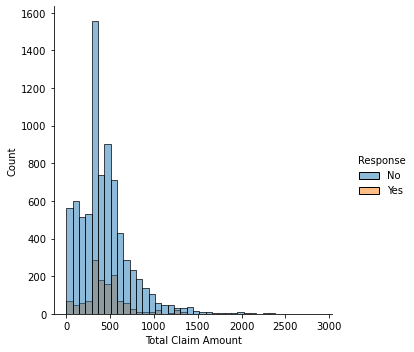

In [7]:
#5 Show a plot of the response rate by the total claim amount.

sns.displot(x='Total Claim Amount', hue = 'Response', data = marketing, bins = 40)

plt.show()

# Observations: very high number of responses around 250-350 total claim amount area, with a super low positive response rate, 
# we might need to understand the reason for it. Otherwise, the response rate is pretty uniform across different levels of TCA

In [8]:
resp_by_tca = marketing.groupby('Total Claim Amount')['Response'].value_counts(normalize=True)
resp_by_tca = resp_by_tca.mul(100).rename('Percent').reset_index()
resp_by_tca
# sns.histplot(x='Total Claim Amount', y = 'Response', data = resp_by_tca, bins = 50)
# plt.show()

,Total Claim Amount,Response,Percent
0,0.099007,No,100.0
1,0.382107,No,100.0
2,0.423310,No,100.0
3,0.517753,No,100.0
4,0.769185,No,100.0
...,...,...,...
5161,2345.413441,No,100.0
5162,2452.894264,No,100.0
5163,2552.343856,No,100.0
5164,2759.794354,No,100.0


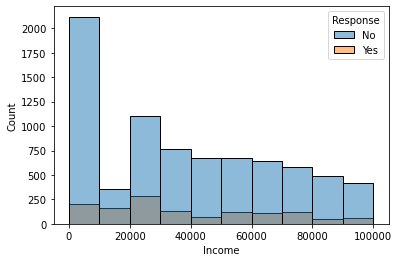

In [9]:
#6 Show a plot of the response rate by income.

sns.histplot(x='Income', hue = 'Response', data = marketing, bins = 10)
plt.show()

# 0 income category with super low positive response rate, might not be targeted in future to reduce costs. 10k-20k group with ultra-high response rate
#, need to understand the reasons for that.

In [10]:
### LAB 4 BEGINS HERE

In [11]:
#1a Check the data types of the columns. 
marketing.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [12]:
#1b Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
numerical = marketing.select_dtypes(include='number')
categoricals = marketing.select_dtypes(include='object')

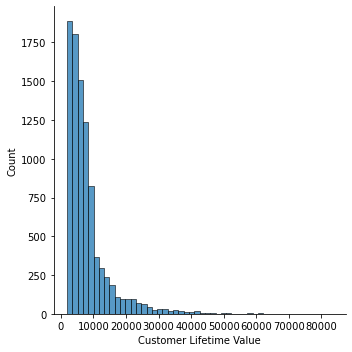

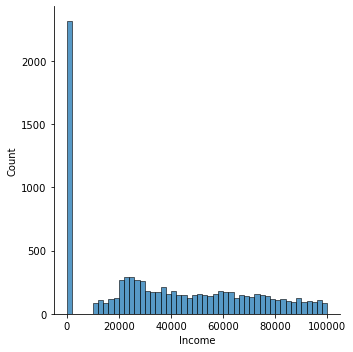

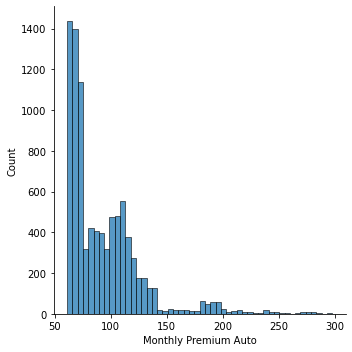

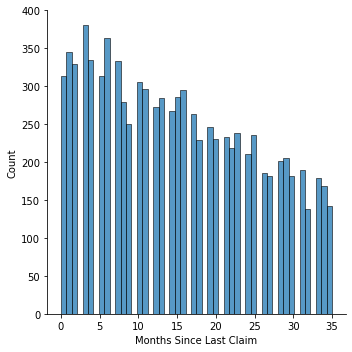

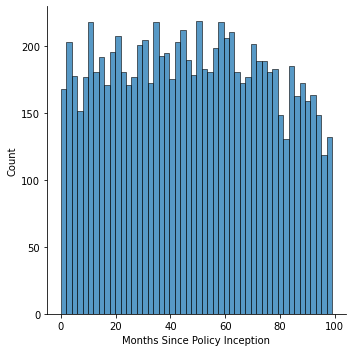

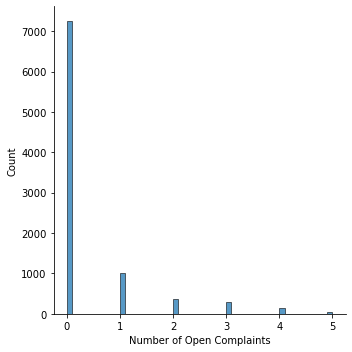

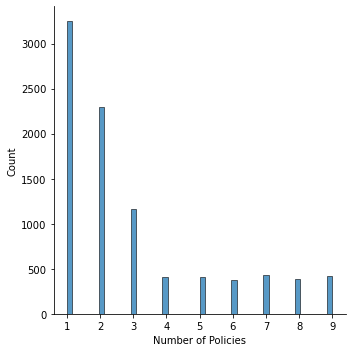

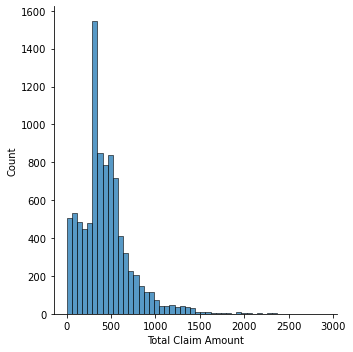

In [16]:
#2a Use seaborn library to construct distribution plots for the numerical variables


# sns.displot(data = numerical.iloc[:,0:1], bins = 50)
# sns.displot(data = numerical.iloc[:,1:2], bins = 50)
# sns.displot(data = numerical.iloc[:,2:3], bins = 50)
# sns.displot(data = numerical.iloc[:,3:4], bins = 50)
# sns.displot(data = numerical.iloc[:,4:5], bins = 50)
# sns.displot(data = numerical.iloc[:,5:6], bins = 50)
# sns.displot(data = numerical.iloc[:,6:7], bins = 50)
# sns.displot(data = numerical.iloc[:,7:8], bins = 50)
# plt.show()


for col in numerical.columns:
    sns.displot(data = numerical[col], bins = 50)
# plt.show()

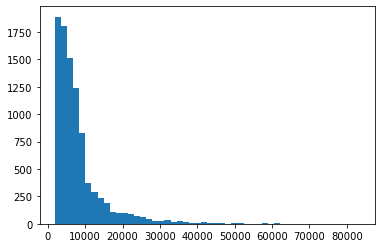

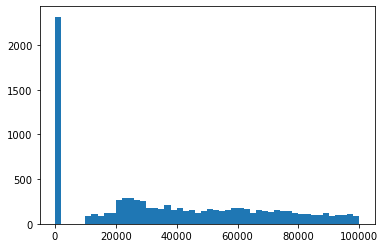

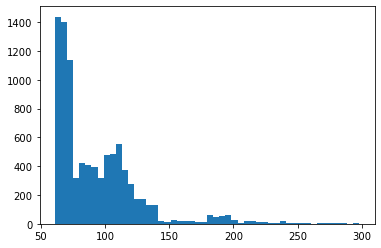

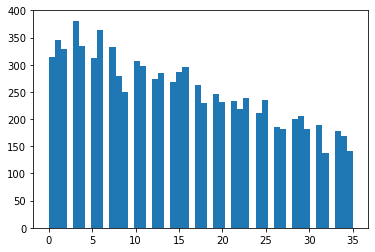

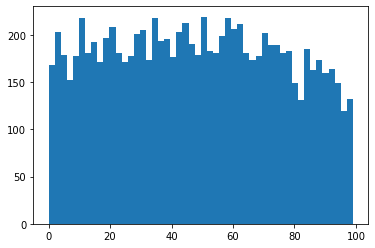

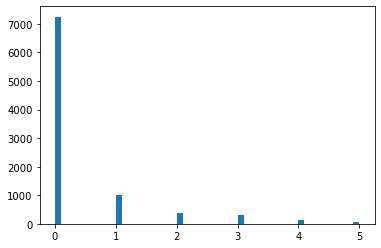

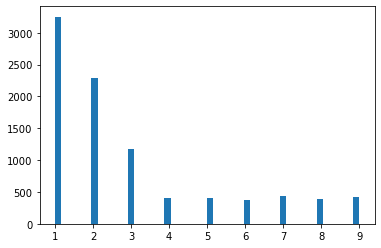

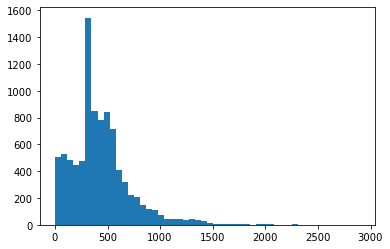

In [20]:
#2b Use Matplotlib to construct histograms

for b in numerical.columns:
    plt.hist(x=b, data=numerical, bins=50)
    plt.show()

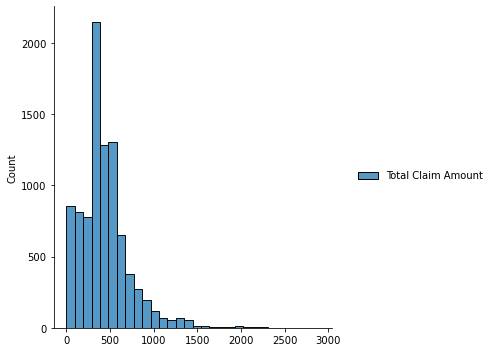

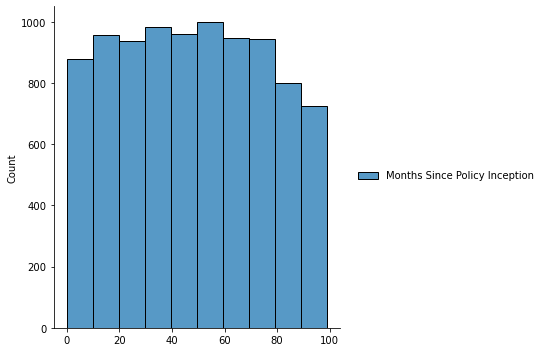

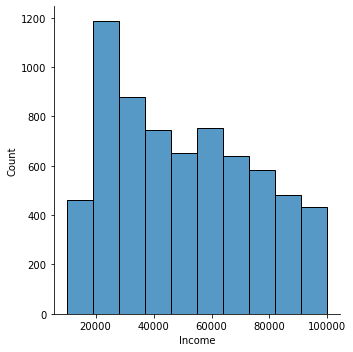

In [37]:
#3 Do the distributions for different numerical variables look like a normal distribution

sns.displot(data = numerical.iloc[:,7:8], bins = 30)
sns.displot(data = numerical.iloc[:,4:5], bins = 10)
sns.displot(data = numerical['Income'][numerical['Income']>0], bins = 10) # we need to remove no income to make it more normal distributed

plt.show()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


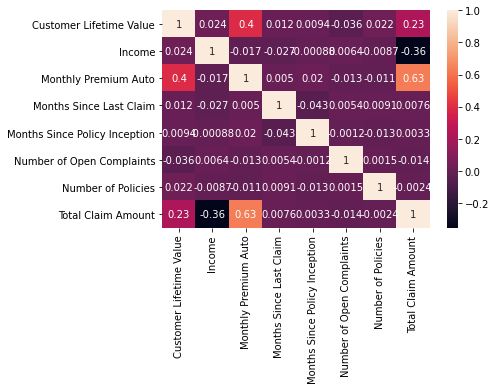

In [38]:
#4 & 5 For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.
# Write code for both the correlation matrix and for seaborn heatmap. 

correlations_matrix = numerical.corr()
display(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
## THIS IS THE BEGINNING OF LAB 5 (ROUND 5)

In [50]:
#1 X-y split.

y = numerical['Total Claim Amount']
X = numerical.drop(columns = 'Total Claim Amount', axis = 1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


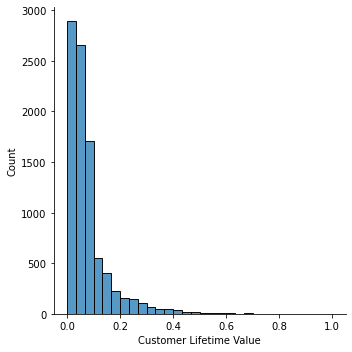

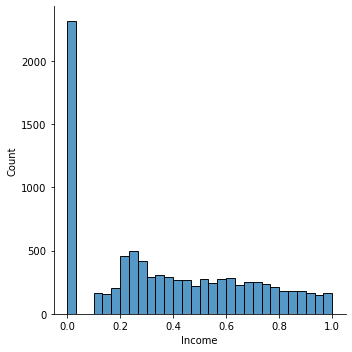

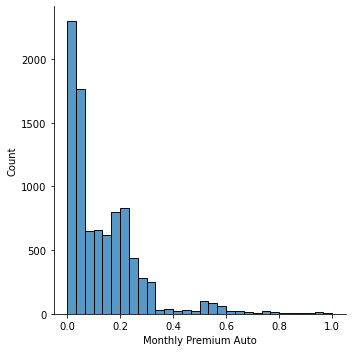

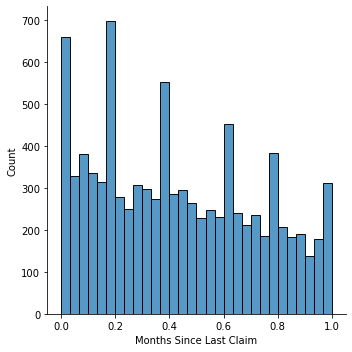

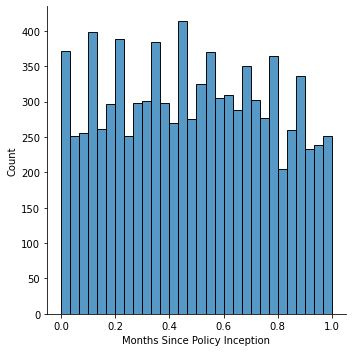

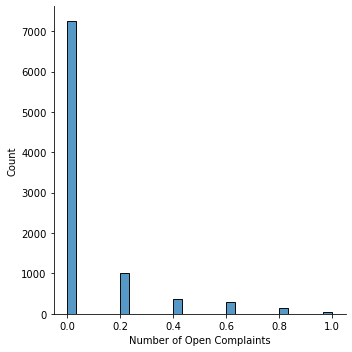

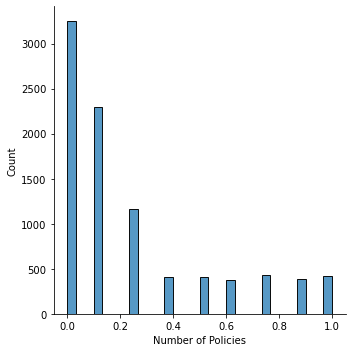

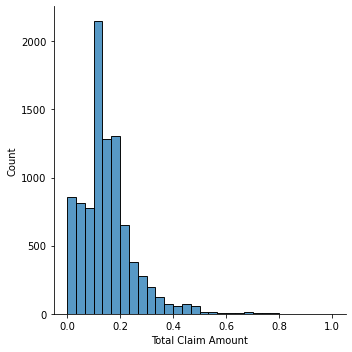

In [55]:
#2 Normalize (numerical).

from sklearn.preprocessing import MinMaxScaler

tr1 = MinMaxScaler().fit(numerical)
x_normalized = tr1.transform(numerical)
data_normalized = pd.DataFrame(x_normalized, columns=numerical.columns)

for col in data_normalized:
    sns.displot(data = data_normalized[col], bins = 30)
plt.show()